## Importing Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir(r"C:\Users\91981\Desktop\ml project")

In [3]:
os.getcwd()

'C:\\Users\\91981\\Desktop\\ml project'

In [4]:
df = pd.read_csv('StudentsPerformance.csv')

In [5]:
df.head(6)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Data has no null values 

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Making a new column 'Ranking' to provide student the rank based on their total marks, We will use this ranking feature for our machine learning model further

In [8]:
df['Total Marks'] = df['math score'] + df['reading score'] + df['writing score']

In [9]:
def grade(marks):
     if marks > 250:
         return 'Excellent'
     elif marks >=200 and marks <= 250:
         return 'Good'
     else:
         return 'Poor'

In [10]:
df['Ranking'] = df['Total Marks'].apply(grade)

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Marks,Ranking
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Good
1,female,group C,some college,standard,completed,69,90,88,247,Good
2,female,group B,master's degree,standard,none,90,95,93,278,Excellent
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Poor
4,male,group C,some college,standard,none,76,78,75,229,Good


## Checking male/female counts

In [51]:
df['gender'].value_counts()

0    518
1    482
Name: gender, dtype: int64

## Checking Male/Female ratio on the basis of race/ethnicity

<AxesSubplot:xlabel='gender', ylabel='count'>

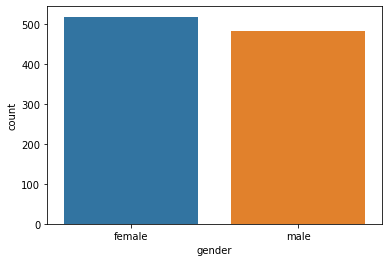

In [12]:
sns.countplot(x="gender",hue='race/ethnicity',data=df)
sns.set_style('whitegrid')

## Checking test preperation course status based on the gender

<AxesSubplot:xlabel='gender', ylabel='count'>

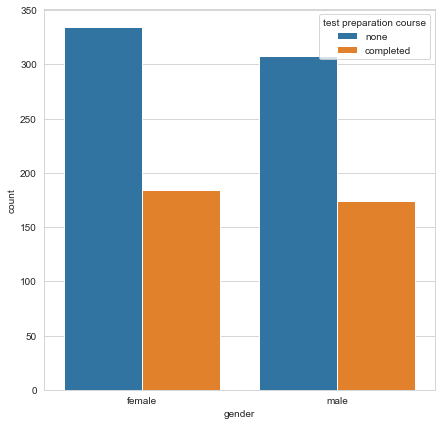

In [13]:
plot = plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.countplot(x="gender", hue="test preparation course" , data=df)

## Checking gender based on ethnicity 

<AxesSubplot:xlabel='gender', ylabel='count'>

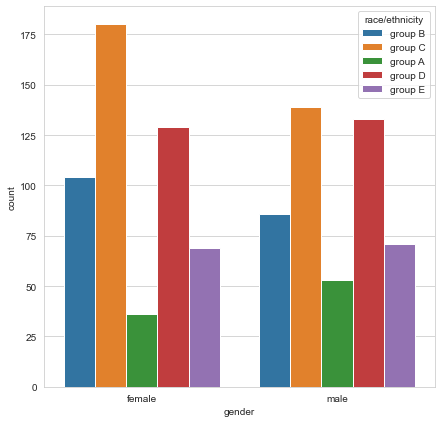

In [14]:
plot = plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.countplot(x="gender", hue="race/ethnicity" , data=df)

## Checking lunch status based on the gender

<AxesSubplot:xlabel='gender', ylabel='count'>

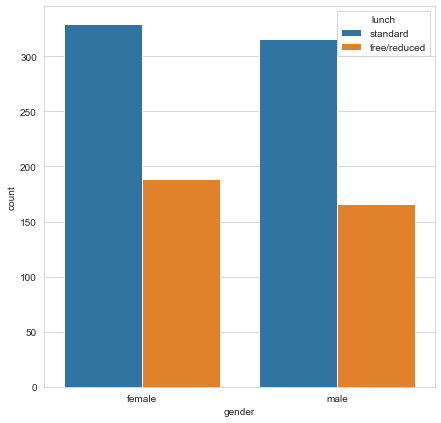

In [15]:
plot = plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.countplot(x="gender", hue="lunch" , data=df)

## Checking which group has performed better in overall marks, We found that group E has relatively performed better than others 

<AxesSubplot:xlabel='race/ethnicity', ylabel='Total Marks'>

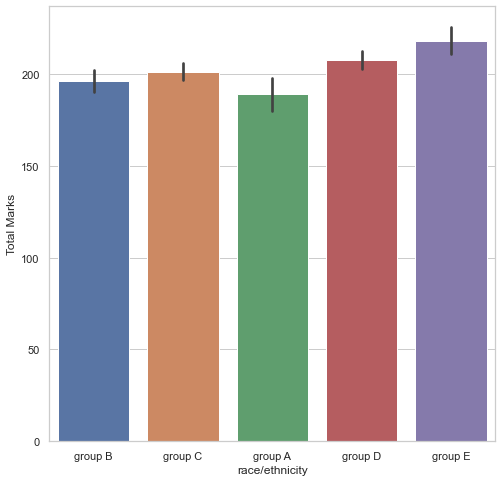

In [16]:
plot = plt.figure(figsize=(8,8))
sns.set(style="whitegrid")
sns.barplot(data=df, x="race/ethnicity", y="Total Marks")

## Checking gender wise which group has performed better in overall total marks, We found that in all the groups girls has relatively performed better 

<AxesSubplot:xlabel='race/ethnicity', ylabel='Total Marks'>

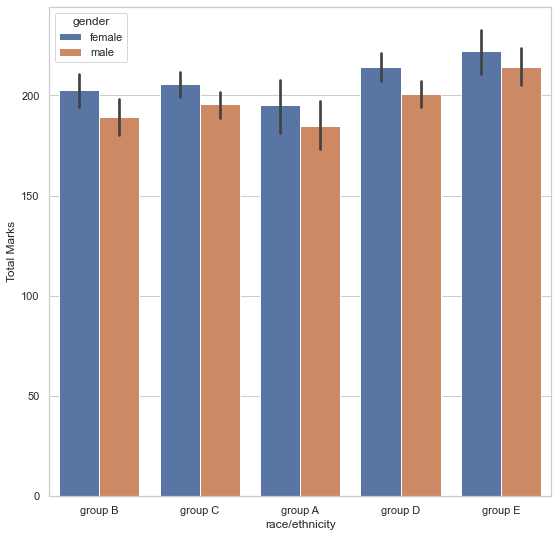

In [17]:
plot = plt.figure(figsize=(9,9))
sns.set(style="whitegrid")
sns.barplot(data=df, x="race/ethnicity", y="Total Marks" , hue='gender')

## Seperating male and female to further analyse based on gender

In [18]:
girls_data = df[df['gender']=='female']

In [19]:
boys_data = df[df['gender']=='male']

In [20]:
girls_data.describe()

,math score,reading score,writing score,Total Marks
count,518.000000,518.000000,518.000000,518.000000
mean,63.633205,72.608108,72.467181,208.708494
std,15.491453,14.378245,14.844842,43.625427
min,0.000000,17.000000,10.000000,27.000000
25%,54.000000,63.250000,64.000000,182.000000
50%,65.000000,73.000000,74.000000,211.000000
75%,74.000000,83.000000,82.000000,236.000000
max,100.000000,100.000000,100.000000,300.000000


In [21]:
boys_data.describe()

,math score,reading score,writing score,Total Marks
count,482.000000,482.000000,482.000000,482.000000
mean,68.728216,65.473029,63.311203,197.512448
std,14.356277,13.931832,14.113832,41.096520
min,27.000000,23.000000,15.000000,69.000000
25%,59.000000,56.000000,53.000000,168.000000
50%,69.000000,66.000000,64.000000,199.000000
75%,79.000000,75.000000,73.750000,228.750000
max,100.000000,100.000000,100.000000,300.000000


## Checking parents education status to see how it affects students performance

In [22]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [23]:
def mean_based_on_parents_edu_math_score():
    num1 = print('Some College' , df.loc[df['parental level of education'].isin(['some college']) , 'math score'].mean())
    num2 = print('Associate Degree', df.loc[df['parental level of education'].isin(["associate's degree"]) , 'math score'].mean())
    num3 = print('High School' , df.loc[df['parental level of education'].isin(["high school"]) , 'math score'].mean())
    num4 = print('Some High School', df.loc[df['parental level of education'].isin(["some high school"]) , 'math score'].mean())
    num5 = print('Bachelor Degree', df.loc[df['parental level of education'].isin(["bachelor's degree"]) , 'math score'].mean())
    num6 = print('Masters Degree', df.loc[df['parental level of education'].isin(["master's degree"]) , 'math score'].mean())
    return [num1,num2,num3,num4,num5,num6];  

## Checking average math score of the students based on their parents education, We found that students whose parents have bachelor & masters's degree has relatively scored better

In [24]:
mean_based_on_parents_edu_math_score()

Some College 67.1283185840708
Associate Degree 67.88288288288288
High School 62.13775510204081
Some High School 63.497206703910614
Bachelor Degree 69.38983050847457
Masters Degree 69.7457627118644


[None, None, None, None, None, None]

In [25]:
def mean_based_on_parents_edu_reading_score():
    num1 = print('Some College' , df.loc[df['parental level of education'].isin(['some college']) , 'reading score'].mean())
    num2 = print('Associate Degree', df.loc[df['parental level of education'].isin(["associate's degree"]) , 'reading score'].mean())
    num3 = print('High School' , df.loc[df['parental level of education'].isin(["high school"]) , 'reading score'].mean())
    num4 = print('Some High School', df.loc[df['parental level of education'].isin(["some high school"]) , 'reading score'].mean())
    num5 = print('Bachelor Degree', df.loc[df['parental level of education'].isin(["bachelor's degree"]) , 'reading score'].mean())
    num6 = print('Masters Degree', df.loc[df['parental level of education'].isin(["master's degree"]) , 'reading score'].mean())
    return [num1,num2,num3,num4,num5,num6];  

## Checking average reading score of the students based on their parents education, We found that students whose parents have masters's degree has relatively scored better

In [26]:
mean_based_on_parents_edu_reading_score()

Some College 69.46017699115045
Associate Degree 70.92792792792793
High School 64.70408163265306
Some High School 66.93854748603351
Bachelor Degree 73.0
Masters Degree 75.37288135593221


[None, None, None, None, None, None]

In [27]:
def mean_based_on_parents_edu_writing_score():
    num1 = print('Some College' , df.loc[df['parental level of education'].isin(['some college']) , 'writing score'].mean())
    num2 = print('Associate Degree', df.loc[df['parental level of education'].isin(["associate's degree"]) , 'writing score'].mean())
    num3 = print('High School' , df.loc[df['parental level of education'].isin(["high school"]) , 'writing score'].mean())
    num4 = print('Some High School', df.loc[df['parental level of education'].isin(["some high school"]) , 'writing score'].mean())
    num5 = print('Bachelor Degree', df.loc[df['parental level of education'].isin(["bachelor's degree"]) , 'writing score'].mean())
    num6 = print('Masters Degree', df.loc[df['parental level of education'].isin(["master's degree"]) , 'writing score'].mean())
    return [num1,num2,num3,num4,num5,num6];  

## Checking average writing score of the student based on their parents education, We found that students whose parents have masters's degree has relatively scored better

In [28]:
mean_based_on_parents_edu_writing_score()

Some College 68.84070796460178
Associate Degree 69.8963963963964
High School 62.44897959183673
Some High School 64.88826815642459
Bachelor Degree 73.38135593220339
Masters Degree 75.67796610169492


[None, None, None, None, None, None]

In [29]:
def percentage_of_test_preperation_couse_based_on_parents_education():
    num1 = df.loc[df['parental level of education'].isin(['some college']) , 'test preparation course'].value_counts()
    percent1 = print('Some College :',round(num1.completed/num1.none*100))
    num2 = df.loc[df['parental level of education'].isin(["associate's degree"]) , 'test preparation course'].value_counts()
    percent2 = print('Associate Degree :', round(num2.completed/num2.none*100))
    num3 = df.loc[df['parental level of education'].isin(["high school"]) , 'test preparation course'].value_counts()
    percent3 = print('High School :',round(num3.completed/num3.none*100))
    num4 = df.loc[df['parental level of education'].isin(["some high school"]) , 'test preparation course'].value_counts()
    percent4 = print('Some High School :',round(num4.completed/num4.none*100))
    num5 = df.loc[df['parental level of education'].isin(["bachelor's degree"]) , 'test preparation course'].value_counts()
    percent5 = print('Bachelor Degree :',round(num5.completed/num5.none*100))
    num6 = df.loc[df['parental level of education'].isin(["master's degree"]) , 'test preparation course'].value_counts()
    percent6 = print('Masters Degree :',round(num6.completed/num6.none*100))
    return [percent1,percent2,percent3,percent4,percent5,percent6];  

## Trying to check if anyhow parents education affect student preperation, We found that parents education has no direct relation with student's preparedness 

In [30]:
percentage_of_test_preperation_couse_based_on_parents_education()

Some College : 52
Associate Degree : 59
High School : 40
Some High School : 75
Bachelor Degree : 64
Masters Degree : 51


[None, None, None, None, None, None]

In [31]:
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Marks,Ranking
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Good
1,female,group C,some college,standard,completed,69,90,88,247,Good
2,female,group B,master's degree,standard,none,90,95,93,278,Excellent
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Poor
4,male,group C,some college,standard,none,76,78,75,229,Good
5,female,group B,associate's degree,standard,none,71,83,78,232,Good
6,female,group B,some college,standard,completed,88,95,92,275,Excellent
7,male,group B,some college,free/reduced,none,40,43,39,122,Poor
8,male,group D,high school,free/reduced,completed,64,64,67,195,Poor
9,female,group B,high school,free/reduced,none,38,60,50,148,Poor


## Encoding categorical features using label encoder

In [32]:
df.drop('Total Marks' , axis=1,inplace=True)

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])
df['lunch'] = le.fit_transform(df['lunch'])
df['Ranking'] = le.fit_transform(df['Ranking'])

In [34]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Ranking
0,0,1,1,1,1,72,72,74,1
1,0,2,4,1,0,69,90,88,1
2,0,1,3,1,1,90,95,93,0
3,1,0,0,0,1,47,57,44,2
4,1,2,4,1,1,76,78,75,1


In [35]:
x = df.drop('Ranking', axis=1)
y = df['Ranking']

In [36]:
print(x)

     gender  race/ethnicity  parental level of education  lunch  \
0         0               1                            1      1   
1         0               2                            4      1   
2         0               1                            3      1   
3         1               0                            0      0   
4         1               2                            4      1   
..      ...             ...                          ...    ...   
995       0               4                            3      1   
996       1               2                            2      0   
997       0               2                            2      0   
998       0               3                            4      1   
999       0               3                            4      0   

     test preparation course  math score  reading score  writing score  
0                          1          72             72             74  
1                          0          69         

In [37]:
print(y)

0      1
1      1
2      0
3      2
4      1
      ..
995    0
996    2
997    2
998    1
999    1
Name: Ranking, Length: 1000, dtype: int32


## Splitting data into training and testing

In [38]:
from sklearn. model_selection import train_test_split

In [39]:
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
from sklearn.ensemble import RandomForestClassifier

## Importing random forest classifier for our model

In [54]:
model =  RandomForestClassifier()

In [55]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
x_test_prediction = model.predict(X_test)

In [58]:
x_test_prediction

array([0, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 0, 1,
       1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2,
       0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2, 2,
       2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 1,
       1, 1])

## Accuracy of the model is 96% 

In [59]:
accuracy = accuracy_score(x_test_prediction,Y_test)

In [60]:
print(accuracy)

0.96


In [48]:
Y_test

521    0
737    2
740    1
660    1
411    1
      ..
408    2
332    2
208    1
613    1
78     1
Name: Ranking, Length: 200, dtype: int32

## Using the model to predict the value (0 - Excellent , 1 - Good , 2 - Poor)

In [73]:
features = np.array([[1,1,1,1,1,50,60,70]])
model.predict(features)

array([2])